In [2]:
# basic IV test routine for single point single dot

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [257]:
import dot_classifier
reload(dot_classifier)
import dot_classifier_tf
reload(dot_classifier_tf)
import thomas_fermi
reload(thomas_fermi)
import markov_graph
reload(markov_graph)
import potential_profile
reload(potential_profile)

import time
st = time.time()
N_v_points = 100
V_d_vec = np.linspace(400e-3,300e-3,N_v_points)
I_vec = np.zeros(N_v_points)

N_grid= 100
x = np.linspace(-1,1,N_grid)
K = thomas_fermi.create_K_matrix(x,E_scale=0.5e-3,sigma=(x[1] - x[0]))

battery_ind = []
max_prob_node = []
max_prob_dist = []

for i in range(N_v_points):
    if (i % 10 == 0):
        print i
    
    d = (V_d_vec[i],0,0.2,1)
    b1 = (-200e-3,0.3,0.1,1)
    b2 = (-200e-3,-0.3,0.1,1)

    V = potential_profile.single_dot_V_x_wire(x,d,b1,b2)                       
    mu_l = (0.1,0.1+0.001)
    
    graph_model = (50,1)
    battery_weight = 1000
    kT = 100e-6
    physics = (x,V,K,mu_l,battery_weight,kT)

   
    if(i==0):
        G = markov_graph.generate_graph(graph_model, physics)
        battery_ind = markov_graph.get_battery_nodes(G)
        max_prob_node_trial  = markov_graph.get_max_prob_node(G)[0][1]
        graph_model = (max_prob_node_trial,1)
        print graph_model
        G = markov_graph.generate_graph(graph_model, physics)
        battery_ind = markov_graph.get_battery_nodes(G)
    else:
        G = markov_graph.recalculate_weights(G,physics)  
    I_vec[i] = markov_graph.get_current(G,battery_ind)
    max_prob_node += [markov_graph.get_max_prob_node(G)[0]]
    max_prob_dist += [markov_graph.get_max_prob_node(G)[1]]

print time.time()-st

0
(14, 1)


/Users/ssk4/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:53: ComplexWarning: Casting complex values to real discards the imaginary part


10
20
30
40
50
60
70
80
90
69.9841380119


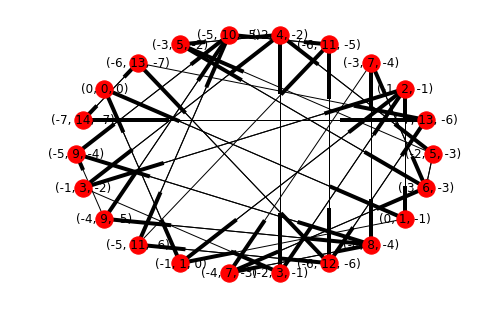

In [254]:
nx.draw_shell(G,with_labels=True)

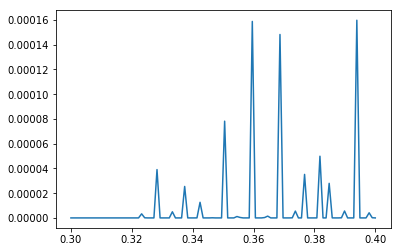

In [255]:
plt.plot(V_d_vec,I_vec)


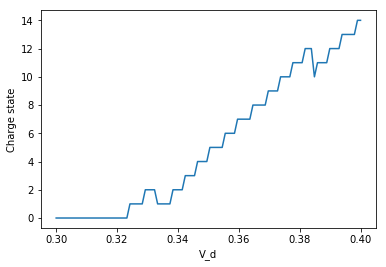

In [256]:
max_prob_node = np.array(max_prob_node)
plt.plot(V_d_vec,max_prob_node[:,1])
plt.xlabel('V_d')
plt.ylabel('Charge state')

[array([39]),
 array([3]),
 array([11]),
 array([11]),
 array([10]),
 array([3]),
 array([3]),
 array([2]),
 array([3]),
 array([3]),
 array([2]),
 array([3]),
 array([2])]

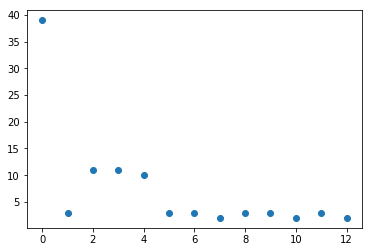

In [249]:
size = []
n = 13
for i in range(n):
    plt_ind = np.argwhere(max_prob_node[:,1] == i)
    size += [plt_ind[-1] - plt_ind[0]]
    
plt.plot(range(n),size,'o')
size

In [204]:
data = []
for i in range(len(V_d_vec)):
    data += [[V_d_vec[i],I_vec[i],max_prob_node[i,1]]]
    
data = np.array(data)-
np.savetxt('/Users/ssk4/quantum-ml/ndot/ml/data/single_dot.txt',data)

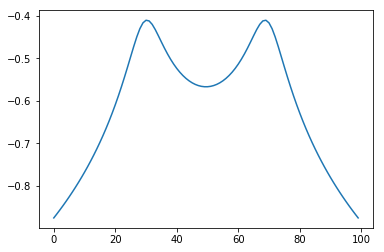

In [222]:
plt.plot(V)

In [111]:
np.array(G.nodes())[:,1]

array([1, 5, 3, 4, 0, 2, 5, 1, 3])

In [120]:
np.array(max_prob_dist).reshape((100,9))


array([[  8.41832944e-04+0.j,   1.71713046e-22+0.j,  -7.93570436e-22+0.j,
          5.75043268e-23+0.j,   9.99157747e-01+0.j,   1.40671439e-16+0.j,
          9.54634977e-66+0.j,   4.20528962e-07+0.j,   5.73902320e-26+0.j],
       [  1.57521003e-03+0.j,   3.27248842e-21+0.j,   4.69005425e-17+0.j,
          2.87217253e-21+0.j,   9.98424003e-01+0.j,   5.34062153e-16+0.j,
          8.19866633e-42+0.j,   7.86590911e-07+0.j,   2.87177258e-24+0.j],
       [  2.94559707e-03+0.j,   1.05448840e-21+0.j,  -2.77890564e-21+0.j,
          3.53133348e-22+0.j,   9.97052933e-01+0.j,   1.72588976e-15+0.j,
          2.05534133e-64+0.j,   1.46989125e-06+0.j,   3.52432694e-25+0.j],
       [  5.50161009e-03+0.j,   3.69273654e-21+0.j,  -5.19407930e-21+0.j,
          1.23664525e-21+0.j,   9.94495648e-01+0.j,   6.03617454e-15+0.j,
          1.34751704e-63+0.j,   2.74184631e-06+0.j,   1.23419162e-24+0.j],
       [  1.02527654e-02+0.j,   6.45869954e-21+0.j,  -9.70367367e-21+0.j,
          2.16292753e-21+0.j,   9.

In [118]:
XX,YY = np.meshgrid(np.array(G.nodes())[:,1],V_d_vec)

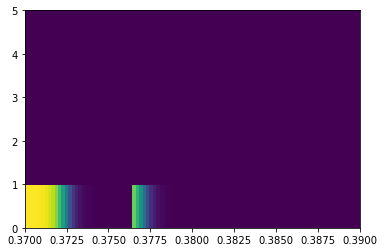

In [125]:
plt.pcolor(YY,XX,np.real(np.array(max_prob_dist).reshape((100,9))))

In [152]:
V_d_vec[32]

0.37646464646464645